# Decision Tree
Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, decision tree algorithm can be used for solving regression and classification problems too.

The general motive of using Decision Tree is to create a training model which can use to predict class or value of target variables by learning decision rules inferred from prior data(training data).

Decision Tree Approach 

The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.
The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level.

Terminology used in decision tree

Root Node: 
It represents entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: 
It is a process of dividing a node into two or more sub-nodes.

Decision Node: 
When a sub-node splits into further sub-nodes, then it is called decision node.

Leaf/ Terminal Node: 
Nodes with no children (no further split) is called Leaf or Terminal node.

Pruning: 
When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.

Branch / Sub-Tree: 
A sub section of decision tree is called branch or sub-tree.

Algorithm used in decision trees:
•	ID3
•	Gini Index
•	Chi-Square
•	Reduction in Variance

. 
Creation of Decision Tree:
ID3

ID3  is a machine learning algorithm or mathematical algorithm for constructing decision tree. 
It constructs tree in a top down manner without backtracking. 
It classifies the dataset by using entropy and information gain to select root node for classification. ID3 can make fasted and short decision tree.

Important factor 

Entropy
Entropy is used to calculate to find uniform structure in the dataset or similar kind of data to divide dataset into several classes. 
If resulting class contain similar data, then entropy will be zero and if resulting class equally divide into two datasets then entropy will be one. 
On the other hand, it measures the impurity of dataset that means higher the entropy value result in more information content. 
Entropy is used to measure how informative is a node. 
                 
                                 Entropy = 

Information gain

Information Gain is used to measure purity or homogeneity in the dataset. Information gain describes how data can be distributed in respect of response variable. 
If information gain is high, then that variable is more informative and can be consider for root node. 
Information gain split the dataset based on an attribute that result in lesser entropy. 
In decision tree information gain find out the highest information gain attribute which divide the dataset into more homogeneous classes or sub-dataset. 

Information Gain = Entropy of a Target Variable (Entropy before Split) – Entropy of a Target Variable in Respect to an Input Variable (Entropy after Split) 


In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("F:\dataset\iris.csv")

In [4]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
x=data.iloc[:,0:4]

In [6]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [7]:
y=data[['species']]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
algo=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5)

In [11]:
algo.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
ypred=algo.predict(xtest)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(ytest,ypred)

0.9

In [15]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

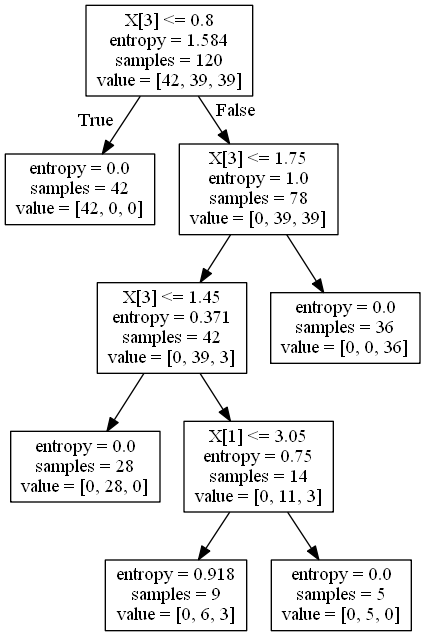

In [16]:
# Create DOT data
dot_data = tree.export_graphviz(algo, out_file=None, 
                                )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [17]:
algo1=DecisionTreeClassifier()
param_dist = {"max_depth": [2,3,4,5,6,7,8,9],
              "min_samples_leaf": [4,3,4,6,7,8,9,10,5],
              "criterion": ["gini", "entropy"]}


In [18]:
from sklearn.model_selection import GridSearchCV

In [21]:
gr=GridSearchCV(estimator=algo1,param_grid=param_dist,scoring = 'accuracy', cv = 10, n_jobs = -1,verbose=True)

In [22]:
gr.fit(xtrain,ytrain)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    8.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [4, 3, 4, 6, 7, 8, 9, 10, 5], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [23]:
gr.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}

In [24]:
gr.best_score_

0.9666666666666667

In [26]:
from sklearn.ensemble import RandomForestClassifier
algo3=RandomForestClassifier()

C:\Users\ASPDISCOVERY\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
algo3.fit(xtrain,ytrain)

C:\Users\ASPDISCOVERY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
es=algo3.estimators_[2]
es

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1659590903, splitter='best')

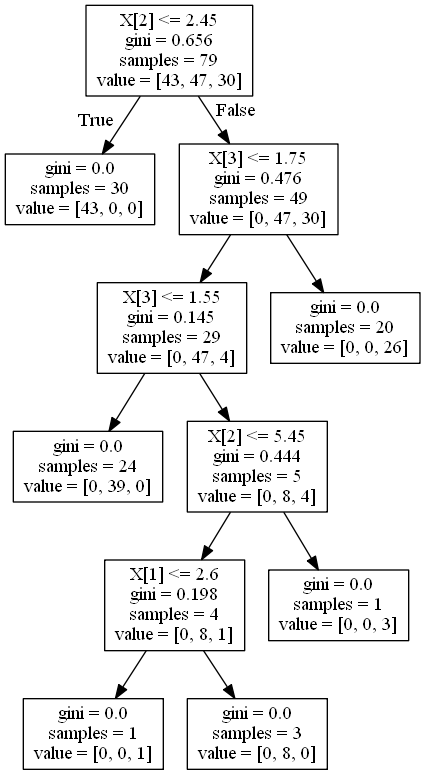

In [178]:
# Create DOT data
dot_data = tree.export_graphviz(es, out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())